# Model Selection

After exploring various models in the previous notebook, in this section I compare all models and prepare the infrastructure for deployment.

In [1]:
sys.path.append("../Melanoma/")
import data_preprocessing
import image_preprocessing
import model_evaluation

In [2]:
# Load Datasets
train_ds, val_ds = model_evaluation.LoadImgDataset("../Datasets/jpeg/train_256/")

Found 32131 files belonging to 2 classes.
Using 25705 files for training.


2021-11-15 21:39:47.582533: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 32131 files belonging to 2 classes.
Using 6426 files for validation.


## Simple Convolutional Neural Network

2021-11-15 13:56:03.148544: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Best Threshold=0.039636, G-Mean=0.718
------------------------------------
Validation AUC    --> 0.7766136683001292
Validation Recall --> 0.7837837837837838
------------------------------------


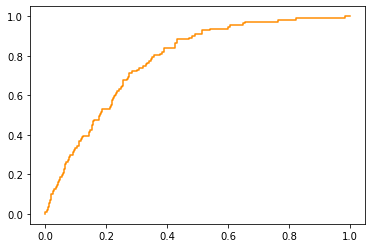

<Figure size 432x288 with 0 Axes>

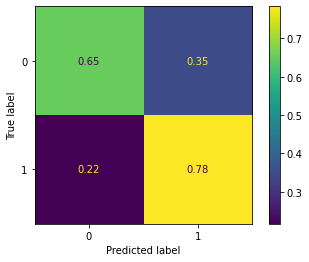

In [6]:
model_evaluation.LoadAndAnalyseModel("../Models/Full Model/BasicCNN_BestAUC.h5", val_ds)

# Data Augmentation on Simple CNN

Best Threshold=0.037629, G-Mean=0.725
------------------------------------
Validation AUC    --> 0.7961923919168574
Validation Recall --> 0.8018018018018018
------------------------------------


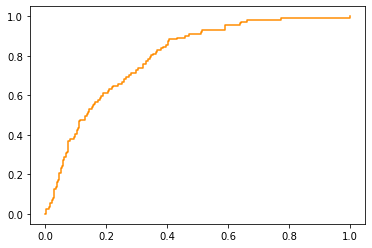

<Figure size 432x288 with 0 Axes>

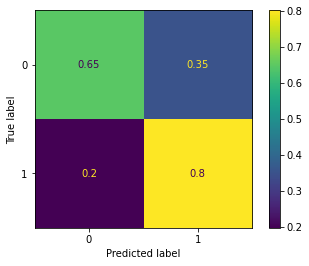

In [7]:
model_evaluation.LoadAndAnalyseModel("../Models/Full Model/ImgAug_BestAUC.h5", val_ds)

## Transfer Learning using EfficientNetB2

Best Threshold=0.060560, G-Mean=0.801
------------------------------------
Validation AUC    --> 0.8661473825369311
Validation Recall --> 0.8288288288288288
------------------------------------


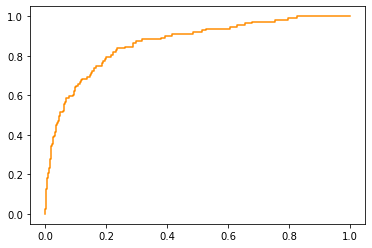

<Figure size 432x288 with 0 Axes>

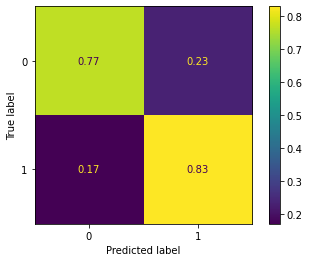

In [8]:
model_evaluation.LoadAndAnalyseModel("../Models/Full Model/EFN_BestAUC", val_ds)

Best Threshold=0.039277, G-Mean=0.803
------------------------------------
Validation AUC    --> 0.8657172612041972
Validation Recall --> 0.8198198198198198
------------------------------------


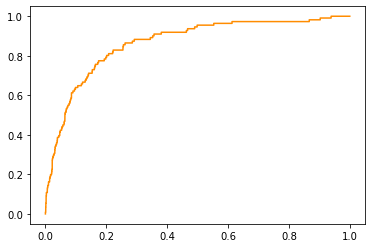

<Figure size 432x288 with 0 Axes>

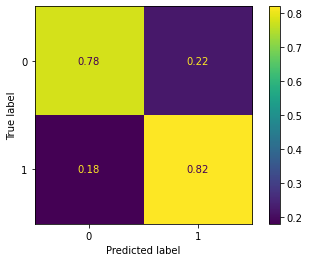

In [11]:
model_evaluation.LoadAndAnalyseModel("../Models/Full Model/EFN_ImgAug_BestAUC", val_ds)

# Conclusions and next steps

Following this analysis, the best two models (EfficientNetB2 with and without Augmentation) provide really similar performance. As this medical purpose requires better recall, the configuration obtained from the model without augmentation is selected to proceed for deployment.

Now, this architecture is encampsulated in the class <b>MelanomaClassifier</b> for deployment in the cloud. The use of this class is showcased in the following lines.

In [8]:
from MelanomaClassifier import MelanomaClassifier

Melanoma_Model = MelanomaClassifier("../Models/Full Model/EFN_BestAUC/")

In [ ]:
for x, y in val_ds.take(1):
    print(Melanoma_Model.predict(x))